In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [69]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [70]:
files = glob.glob("*.csv")

data_dict = {}
for file in files:
    df = pd.read_csv(file)
    data_dict[file] = df
    print(f"{file}: {len(df)} записей")

fantasy_many_dragons_ab3.csv: 2001 записей
fantasy_many_dragons_euler.csv: 2001 записей
fantasy_many_dragons_rk4.csv: 2001 записей
fantasy_many_sheep_ab3.csv: 2001 записей
fantasy_many_sheep_euler.csv: 2001 записей
fantasy_many_sheep_rk4.csv: 2001 записей
fantasy_near_eq_ab3.csv: 2001 записей
fantasy_near_eq_euler.csv: 2001 записей
fantasy_near_eq_rk4.csv: 2001 записей
real_many_foxes_ab3.csv: 321 записей
real_many_foxes_euler.csv: 321 записей
real_many_foxes_rk4.csv: 321 записей
real_many_rabbits_ab3.csv: 321 записей
real_many_rabbits_euler.csv: 321 записей
real_many_rabbits_rk4.csv: 321 записей
real_near_eq_ab3.csv: 321 записей
real_near_eq_euler.csv: 321 записей
real_near_eq_rk4.csv: 321 записей


In [71]:
def plot_scenario_comparison(scenario_type):
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    rk4_files = [f for f in files if scenario_type in f and 'rk4' in f]
    ab3_files = [f for f in files if scenario_type in f and 'ab3' in f]
    euler_files = [f for f in files if scenario_type in f and 'euler' in f]
    
    df_rk4 = data_dict[rk4_files[0]]
    df_ab3 = data_dict[ab3_files[0]]
    df_euler = data_dict[euler_files[0]]
    
    axes[0, 0].plot(df_rk4['time'], df_rk4.iloc[:, 1], 'b-', linewidth=2, label='РК4', alpha=0.8)
    axes[0, 0].plot(df_ab3['time'], df_ab3.iloc[:, 1], 'b--', linewidth=2, label='АБ3', alpha=0.8)
    axes[0, 0].set_xlabel('Время, годы')
    axes[0, 0].set_ylabel('Численность')
    axes[0, 0].set_title('Динамика жертв')
    axes[0, 0].legend(loc='best', fontsize=9)
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(df_rk4['time'], df_rk4.iloc[:, 2], 'r-', linewidth=2, label='РК4', alpha=0.8)
    axes[0, 1].plot(df_ab3['time'], df_ab3.iloc[:, 2], 'r--', linewidth=2, label='АБ3', alpha=0.8)
    axes[0, 1].set_xlabel('Время, годы')
    axes[0, 1].set_ylabel('Численность')
    axes[0, 1].set_title('Динамика хищников')
    axes[0, 1].legend(loc='best', fontsize=9)
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[0, 2].plot(df_rk4['time'], df_rk4.iloc[:, 1], 'b-', linewidth=2, label='Жертвы', alpha=0.8)
    axes[0, 2].plot(df_rk4['time'], df_rk4.iloc[:, 2], 'r-', linewidth=2, label='Хищники', alpha=0.8)
    axes[0, 2].set_xlabel('Время, годы')
    axes[0, 2].set_ylabel('Численность')
    axes[0, 2].set_title('Совмещенная динамика (РК4)')
    axes[0, 2].legend(loc='best', fontsize=9)
    axes[0, 2].grid(True, alpha=0.3)
    
    axes[1, 0].plot(df_ab3.iloc[:, 1], df_ab3.iloc[:, 2], 'purple', linewidth=1.5, alpha=0.7, label='АБ3')
    axes[1, 0].plot(df_ab3.iloc[0, 1], df_ab3.iloc[0, 2], 'mo', markersize=8, label='Начало')
    axes[1, 0].set_xlabel('Жертвы')
    axes[1, 0].set_ylabel('Хищники')
    axes[1, 0].set_title('Фазовый портрет (АБ3)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend(loc='best', fontsize=9)
    
    axes[1, 1].plot(df_euler.iloc[:, 1], df_euler.iloc[:, 2], 'orange', linewidth=1.5, alpha=0.7, label='Эйлер')
    axes[1, 1].plot(df_euler.iloc[0, 1], df_euler.iloc[0, 2], 'yo', markersize=8, label='Начало')
    axes[1, 1].set_xlabel('Жертвы')
    axes[1, 1].set_ylabel('Хищники')
    axes[1, 1].set_title('Фазовый портрет (Эйлер)')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend(loc='best', fontsize=9)

    axes[1, 2].plot(df_rk4.iloc[:, 1], df_rk4.iloc[:, 2], 'g-', linewidth=1.5, alpha=0.7, label='РК4')
    axes[1, 2].plot(df_rk4.iloc[0, 1], df_rk4.iloc[0, 2], 'go', markersize=8, label='Начало')
    axes[1, 2].set_xlabel('Жертвы')
    axes[1, 2].set_ylabel('Хищники')
    axes[1, 2].set_title('Фазовый портрет (РК4)')
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].legend(loc='best', fontsize=9)
    
    axes[2, 0].plot(df_euler['time'], df_euler.iloc[:, 1], 'b-', linewidth=2, label='Жертвы', alpha=0.8)
    axes[2, 0].plot(df_euler['time'], df_euler.iloc[:, 2], 'r-', linewidth=2, label='Хищники', alpha=0.8)
    axes[2, 0].set_xlabel('Время, годы')
    axes[2, 0].set_ylabel('Численность')
    axes[2, 0].set_title('Совмещенная динамика (Эйлер)')
    axes[2, 0].legend(loc='best', fontsize=9)
    axes[2, 0].grid(True, alpha=0.3)
    
    axes[2, 1].plot(df_rk4['time'], df_rk4.iloc[:, 1], 'b:', linewidth=2, label='РК4', alpha=0.8)
    axes[2, 1].plot(df_euler['time'], df_euler.iloc[:, 1], 'b-', linewidth=2, label='Эйлер', alpha=0.8)
    axes[2, 1].set_xlabel('Время, годы')
    axes[2, 1].set_ylabel('Численность')
    axes[2, 1].set_title('Сравнение методов (жертвы)')
    axes[2, 1].legend(loc='best', fontsize=9)
    axes[2, 1].grid(True, alpha=0.3)
    
    axes[2, 2].plot(df_rk4['time'], df_rk4.iloc[:, 2], 'r:', linewidth=2, label='РК4', alpha=0.8)
    axes[2, 2].plot(df_euler['time'], df_euler.iloc[:, 2], 'r-', linewidth=2, label='Эйлер', alpha=0.8)
    axes[2, 2].set_xlabel('Время, годы')
    axes[2, 2].set_ylabel('Численность')
    axes[2, 2].set_title('Сравнение методов (хищники)')
    axes[2, 2].legend(loc='best', fontsize=9)
    axes[2, 2].grid(True, alpha=0.3)
    
    plt.suptitle(f'Сценарий: {scenario_type}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

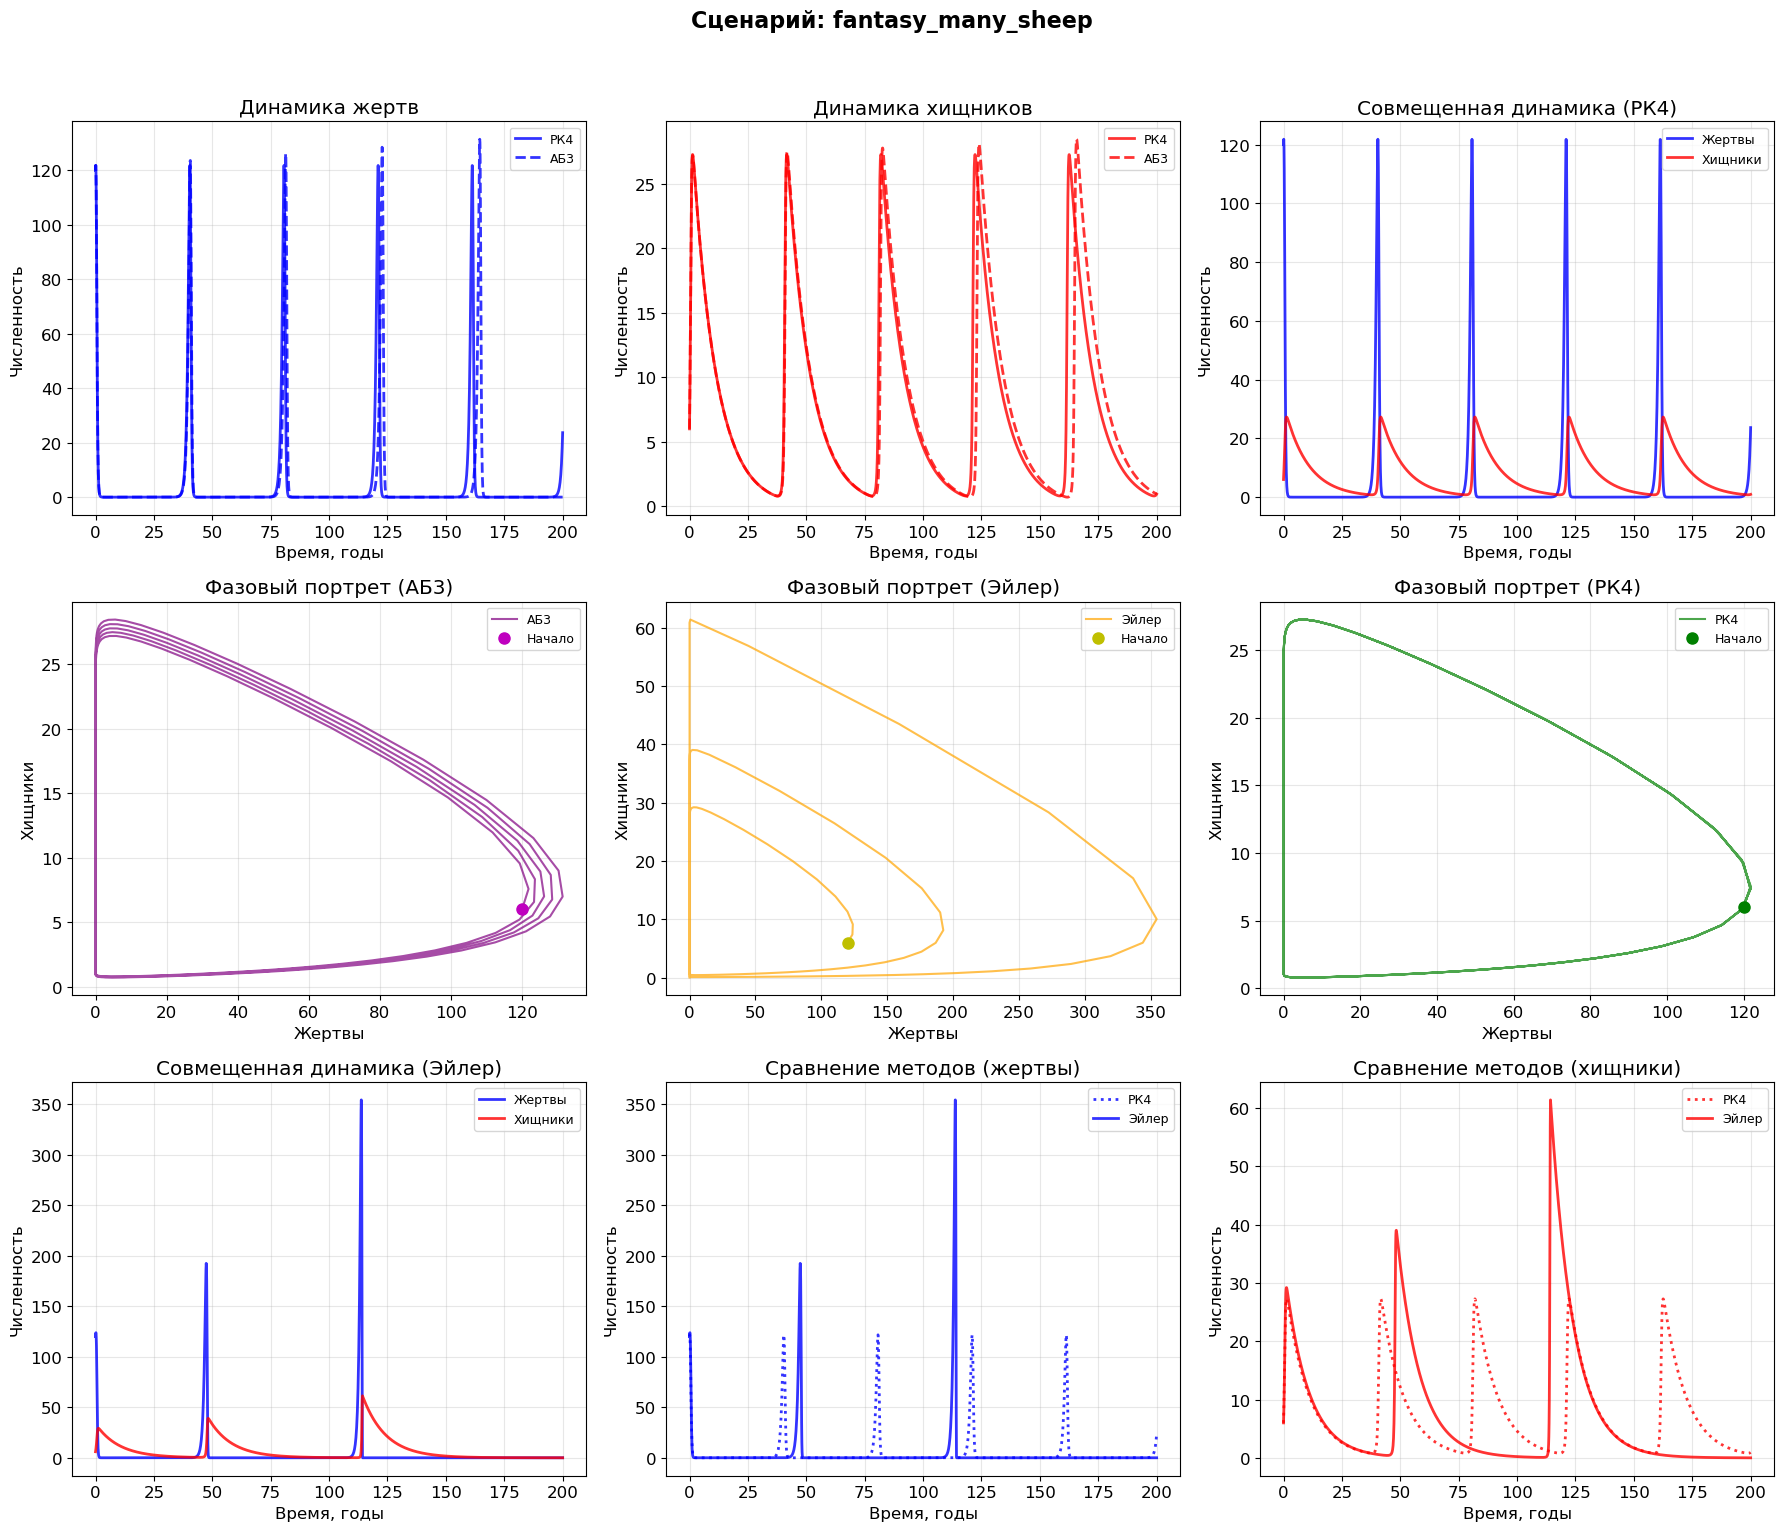

In [72]:
# 1.1 Сценарий: много овец
plot_scenario_comparison('fantasy_many_sheep')

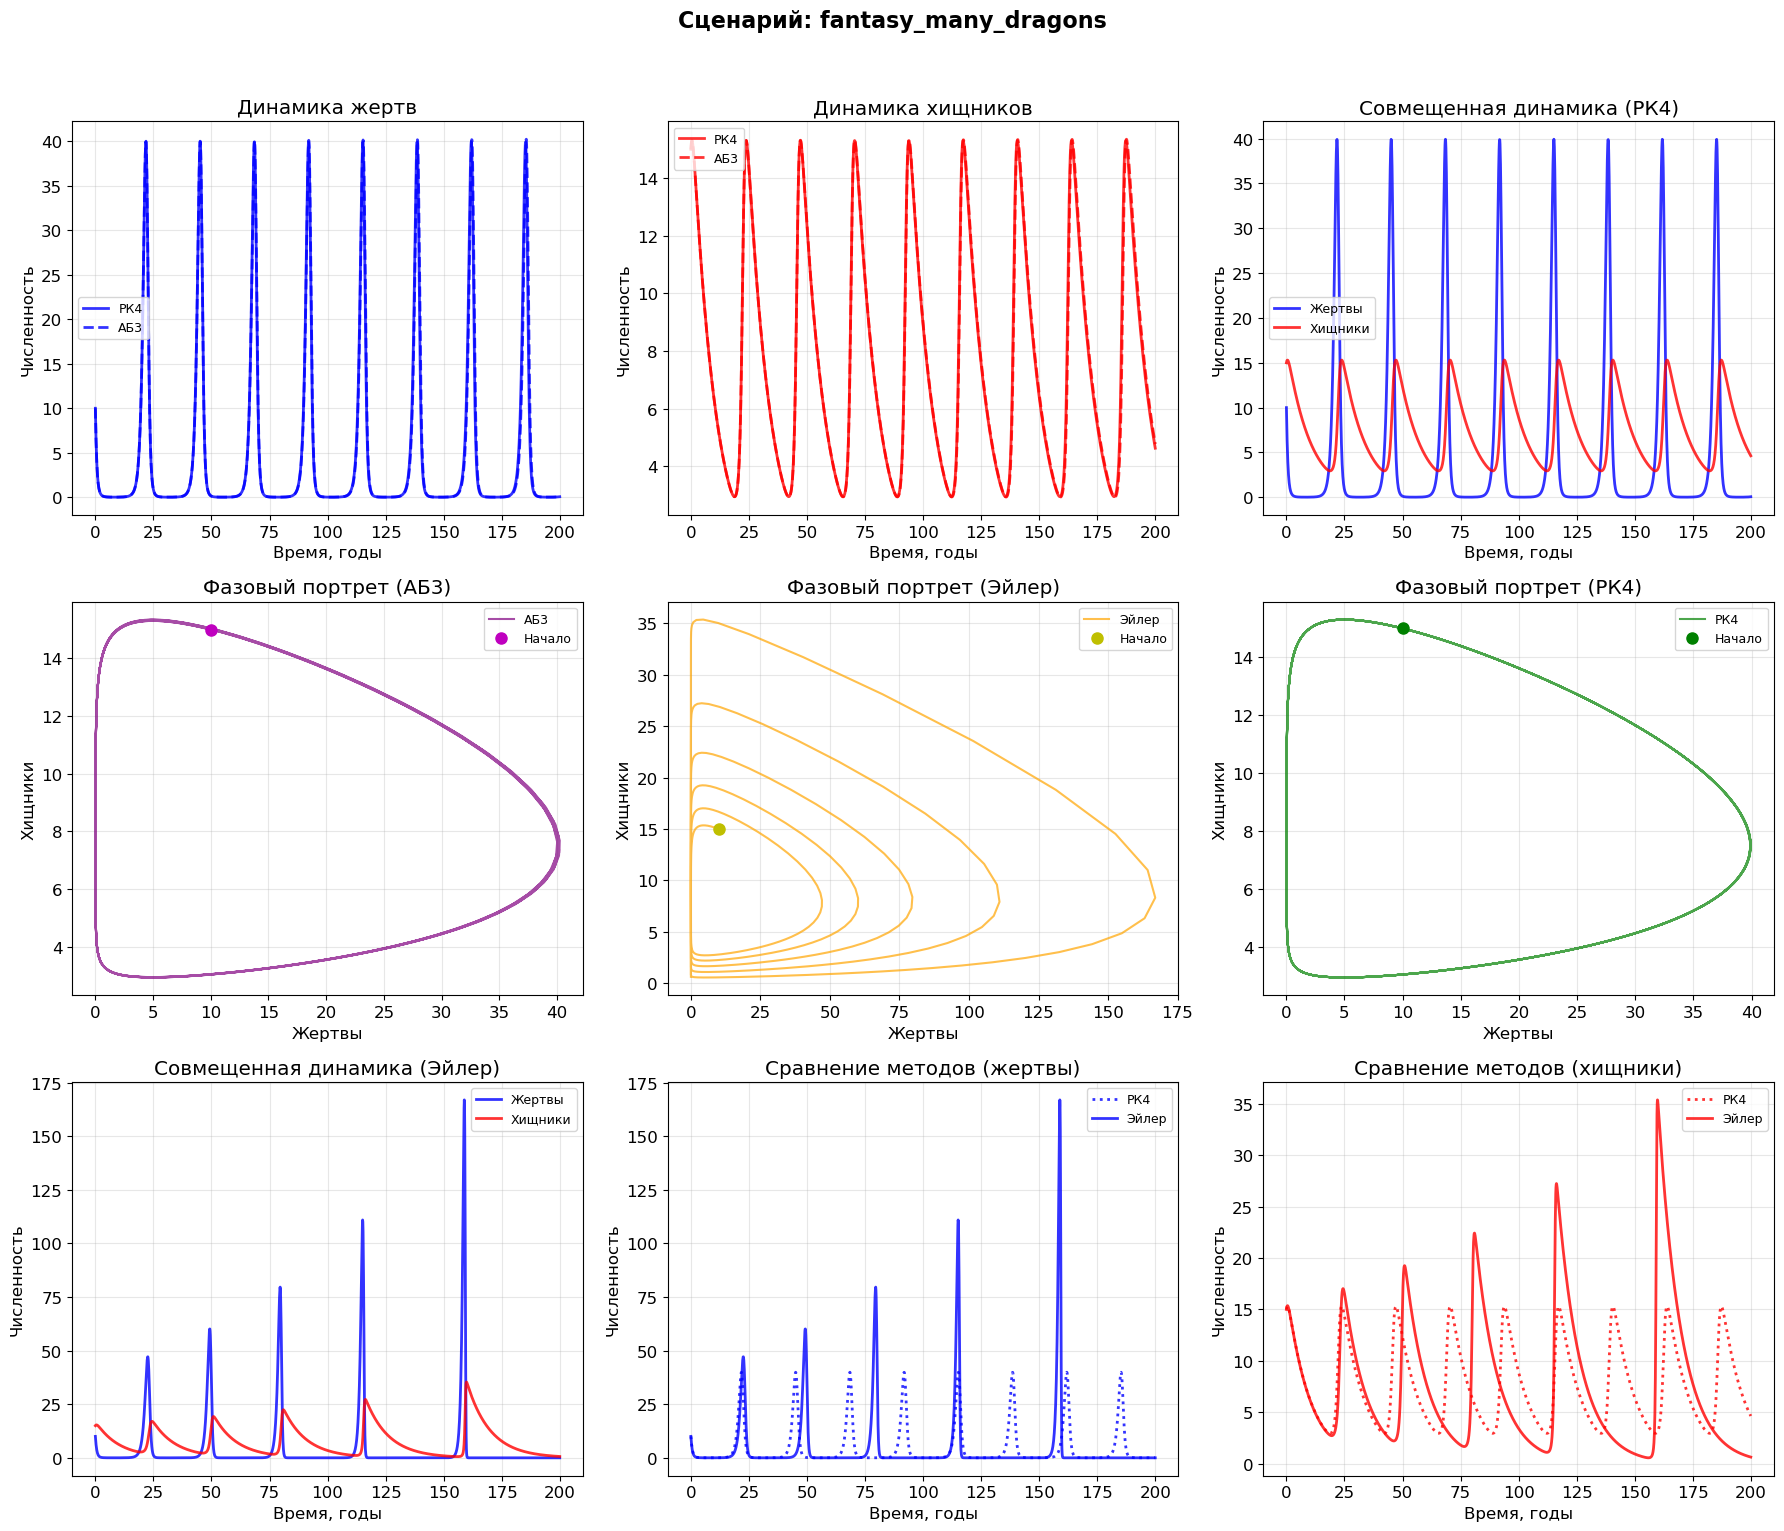

In [73]:
# 1.2 Сценарий: много драконов
plot_scenario_comparison('fantasy_many_dragons')

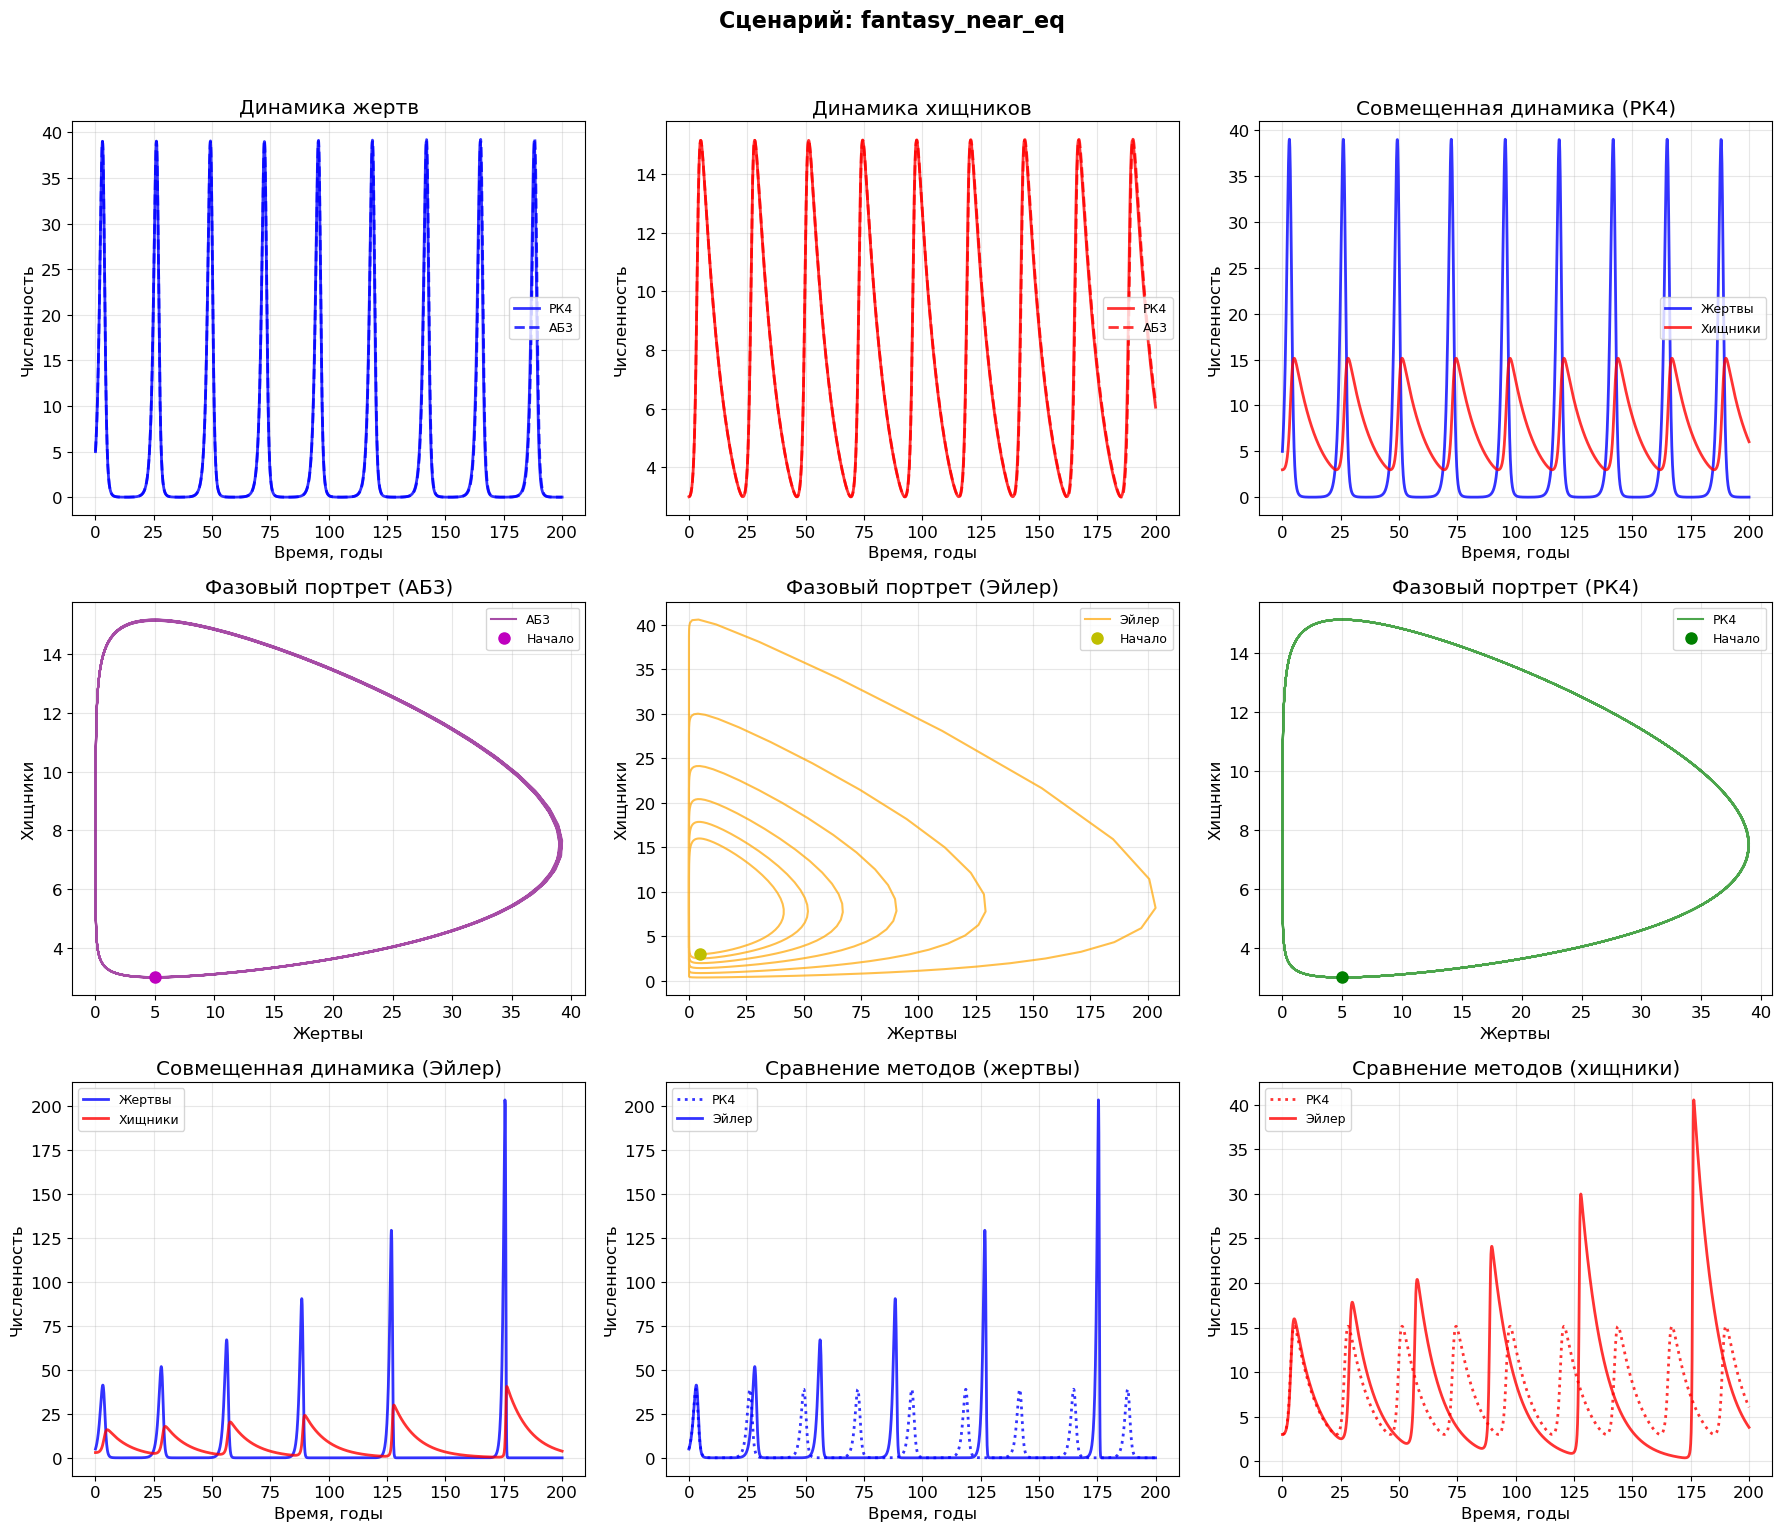

In [74]:
# 1.3 Сценарий: около равновесия
plot_scenario_comparison('fantasy_near_eq')

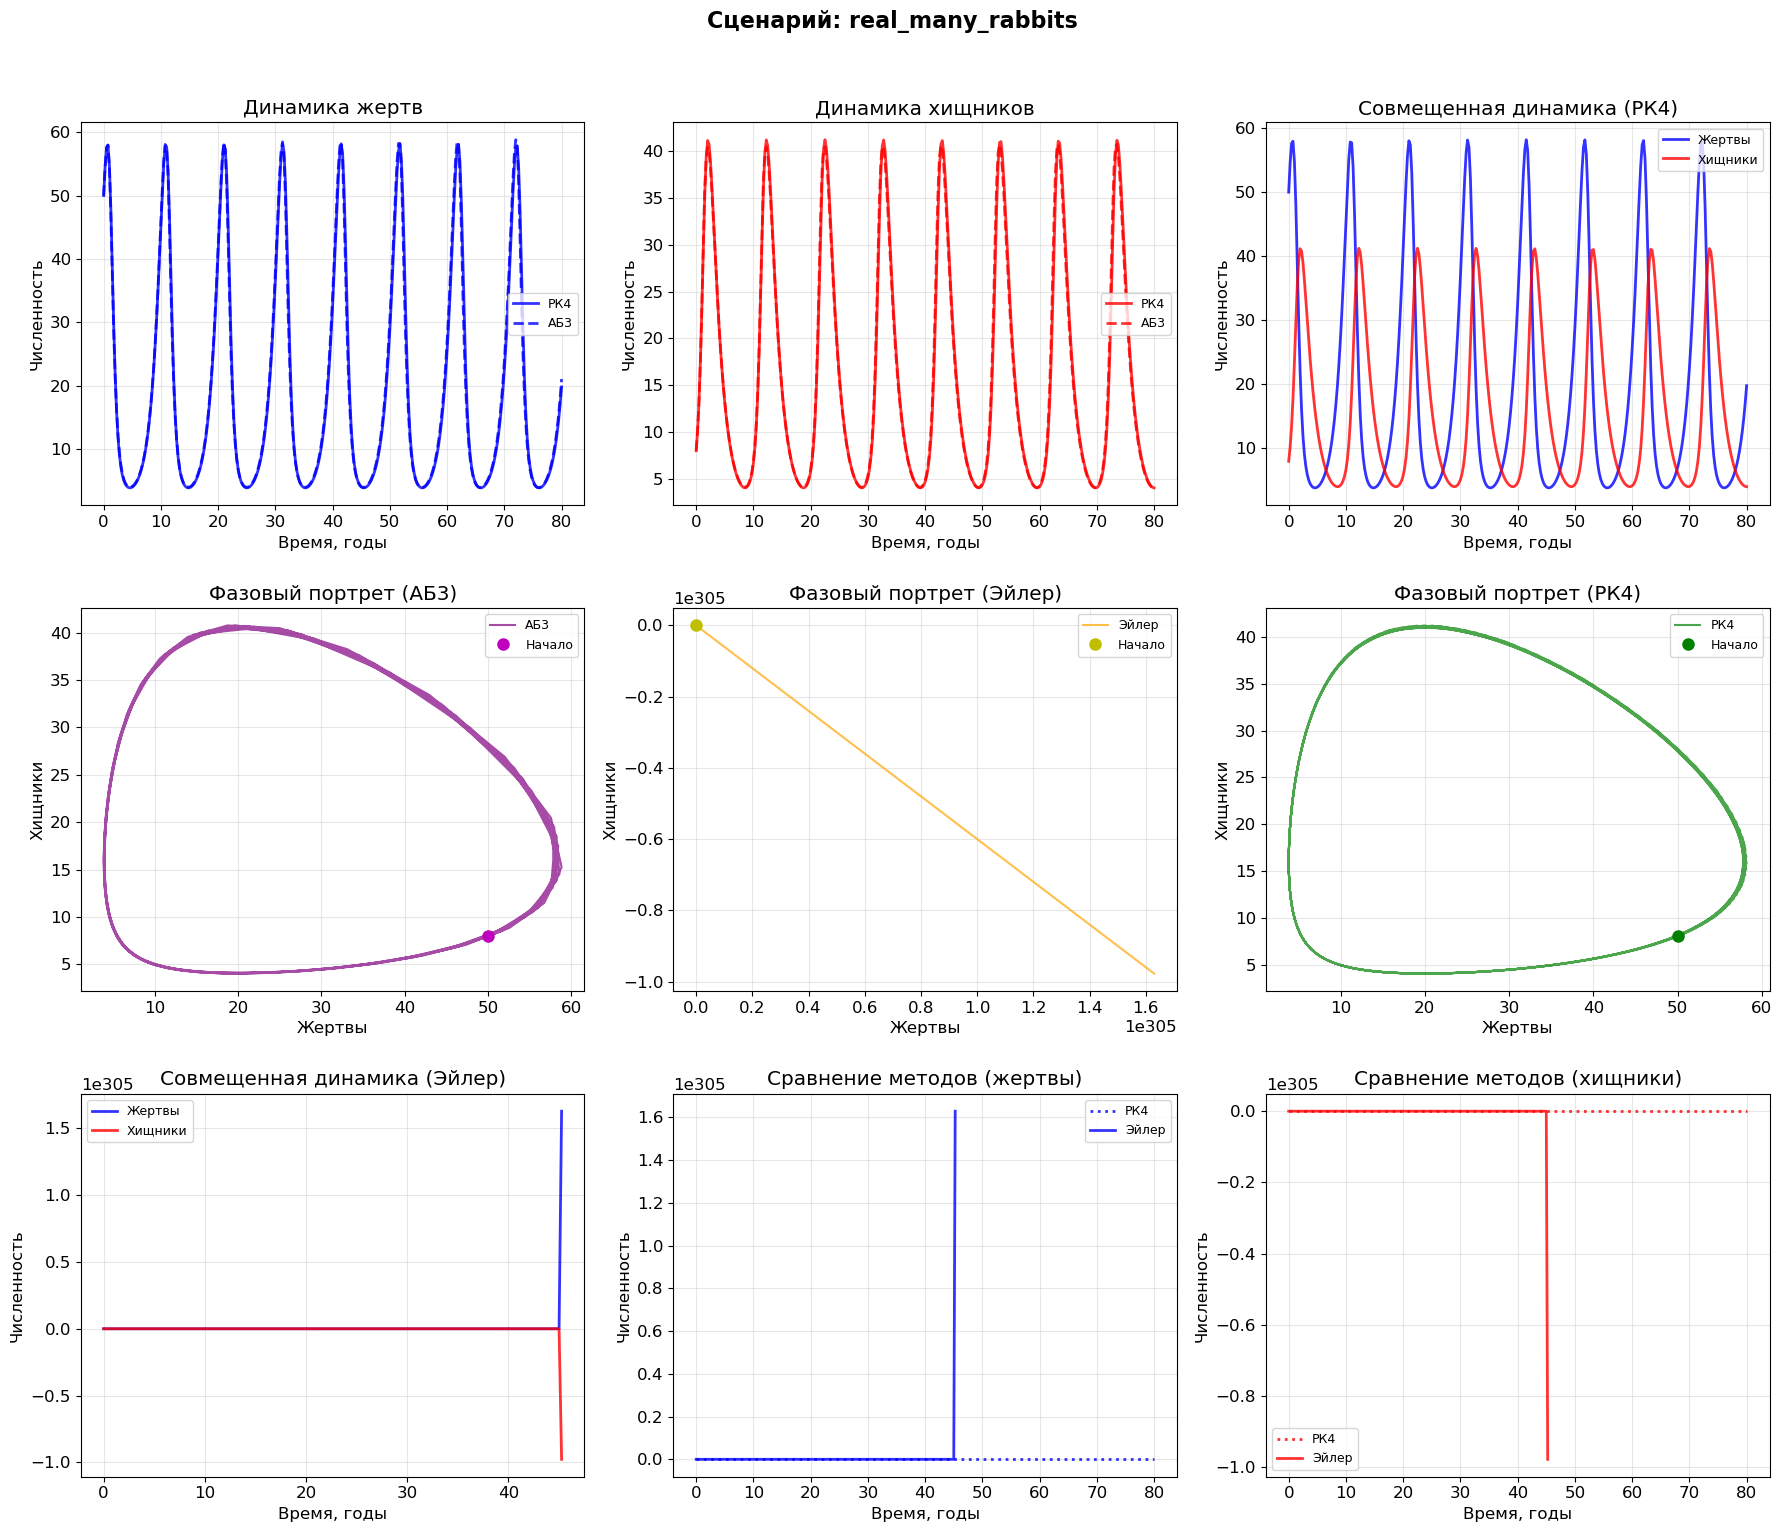

In [75]:
# 2.1 Сценарий: много кроликов
plot_scenario_comparison('real_many_rabbits')

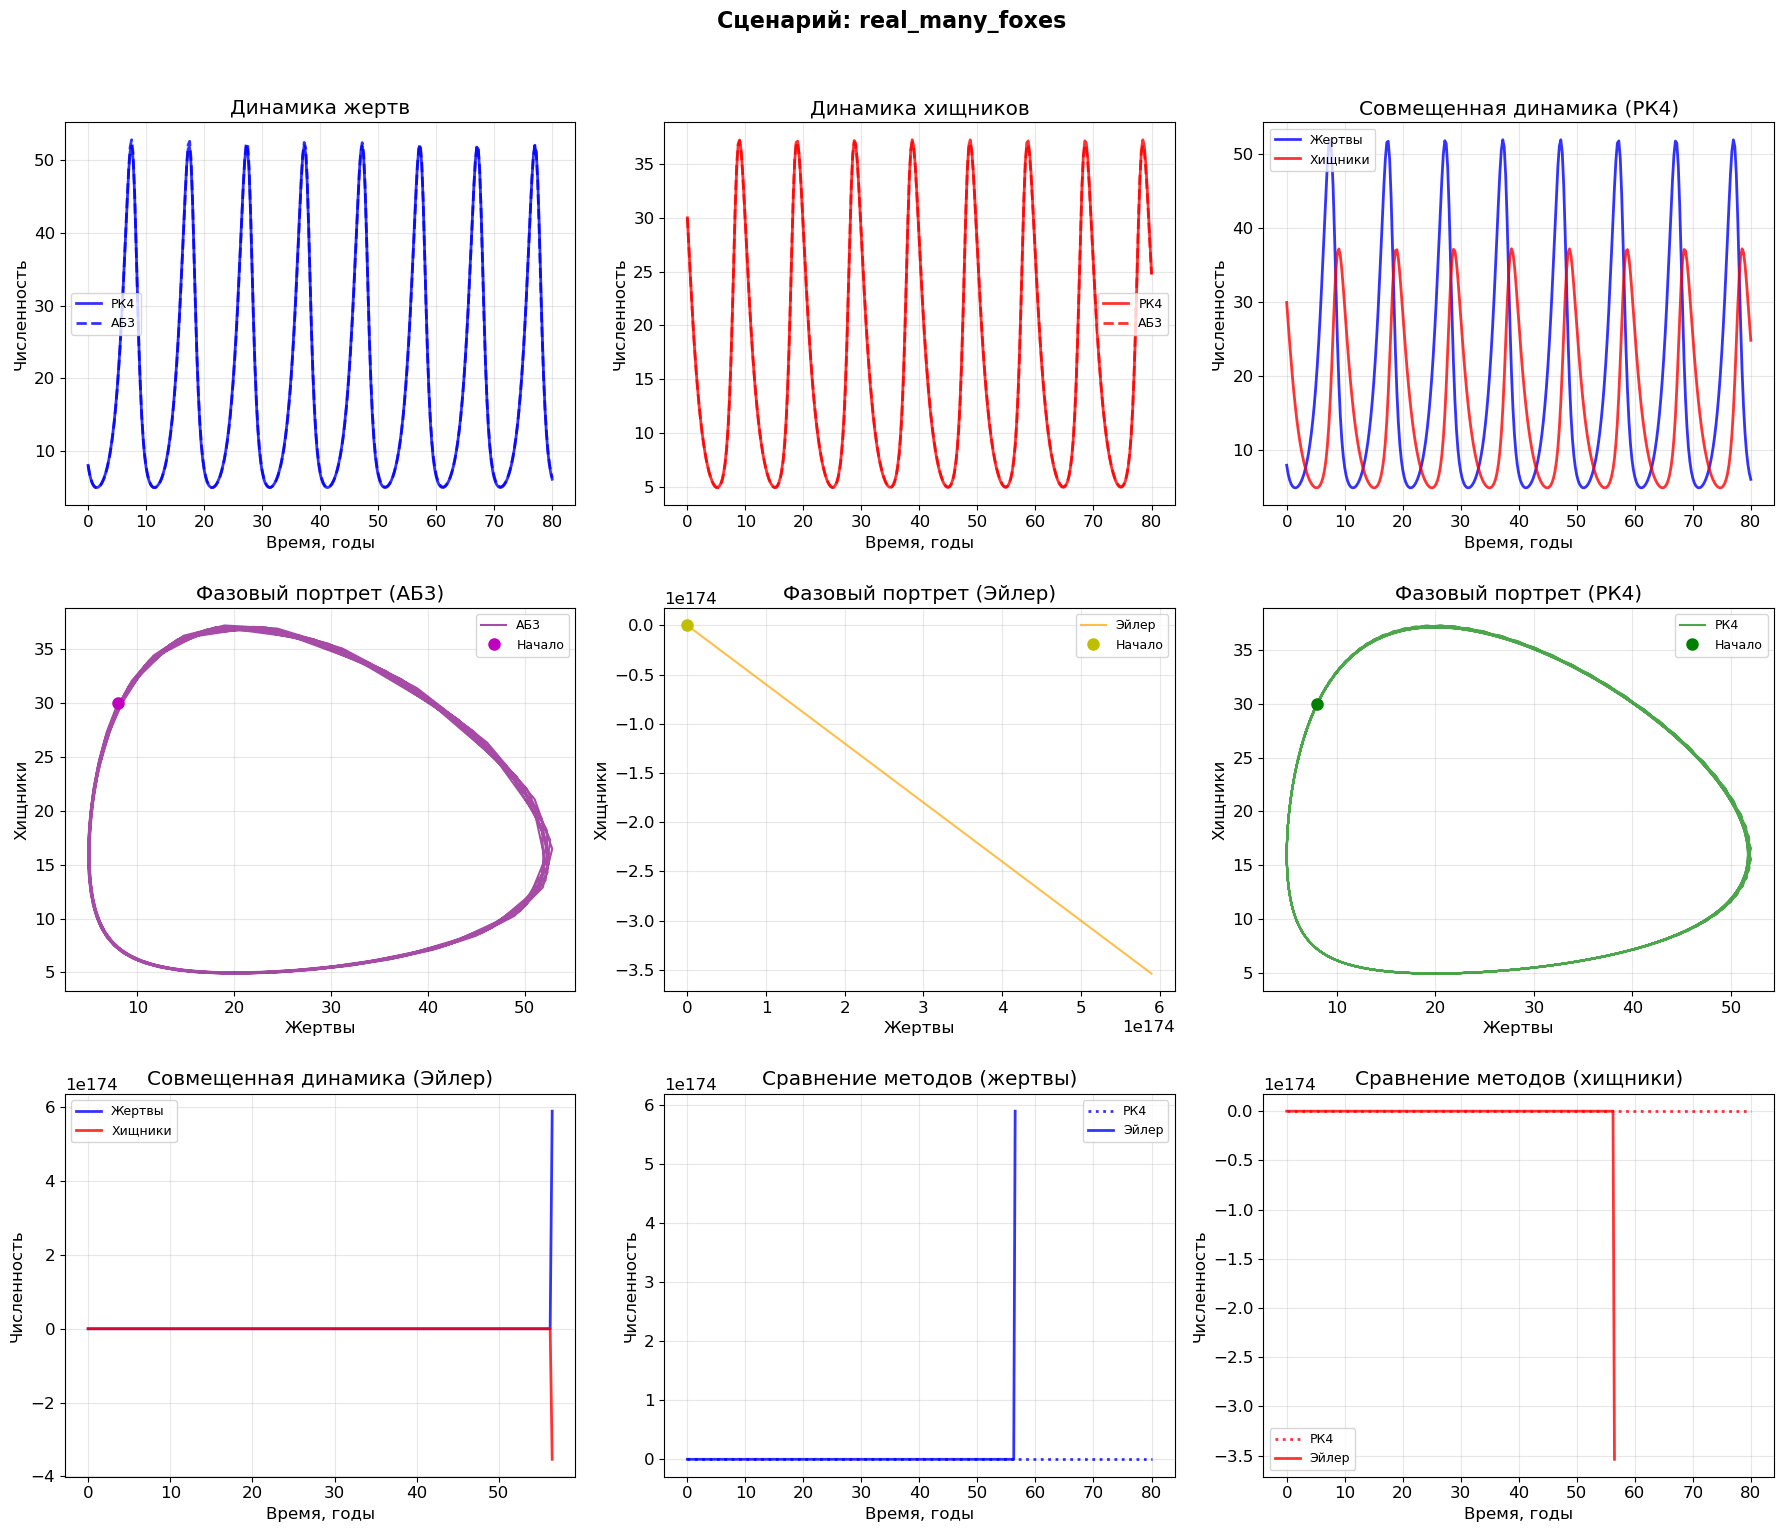

In [76]:
# 2.2 Сценарий: много лис
plot_scenario_comparison('real_many_foxes')

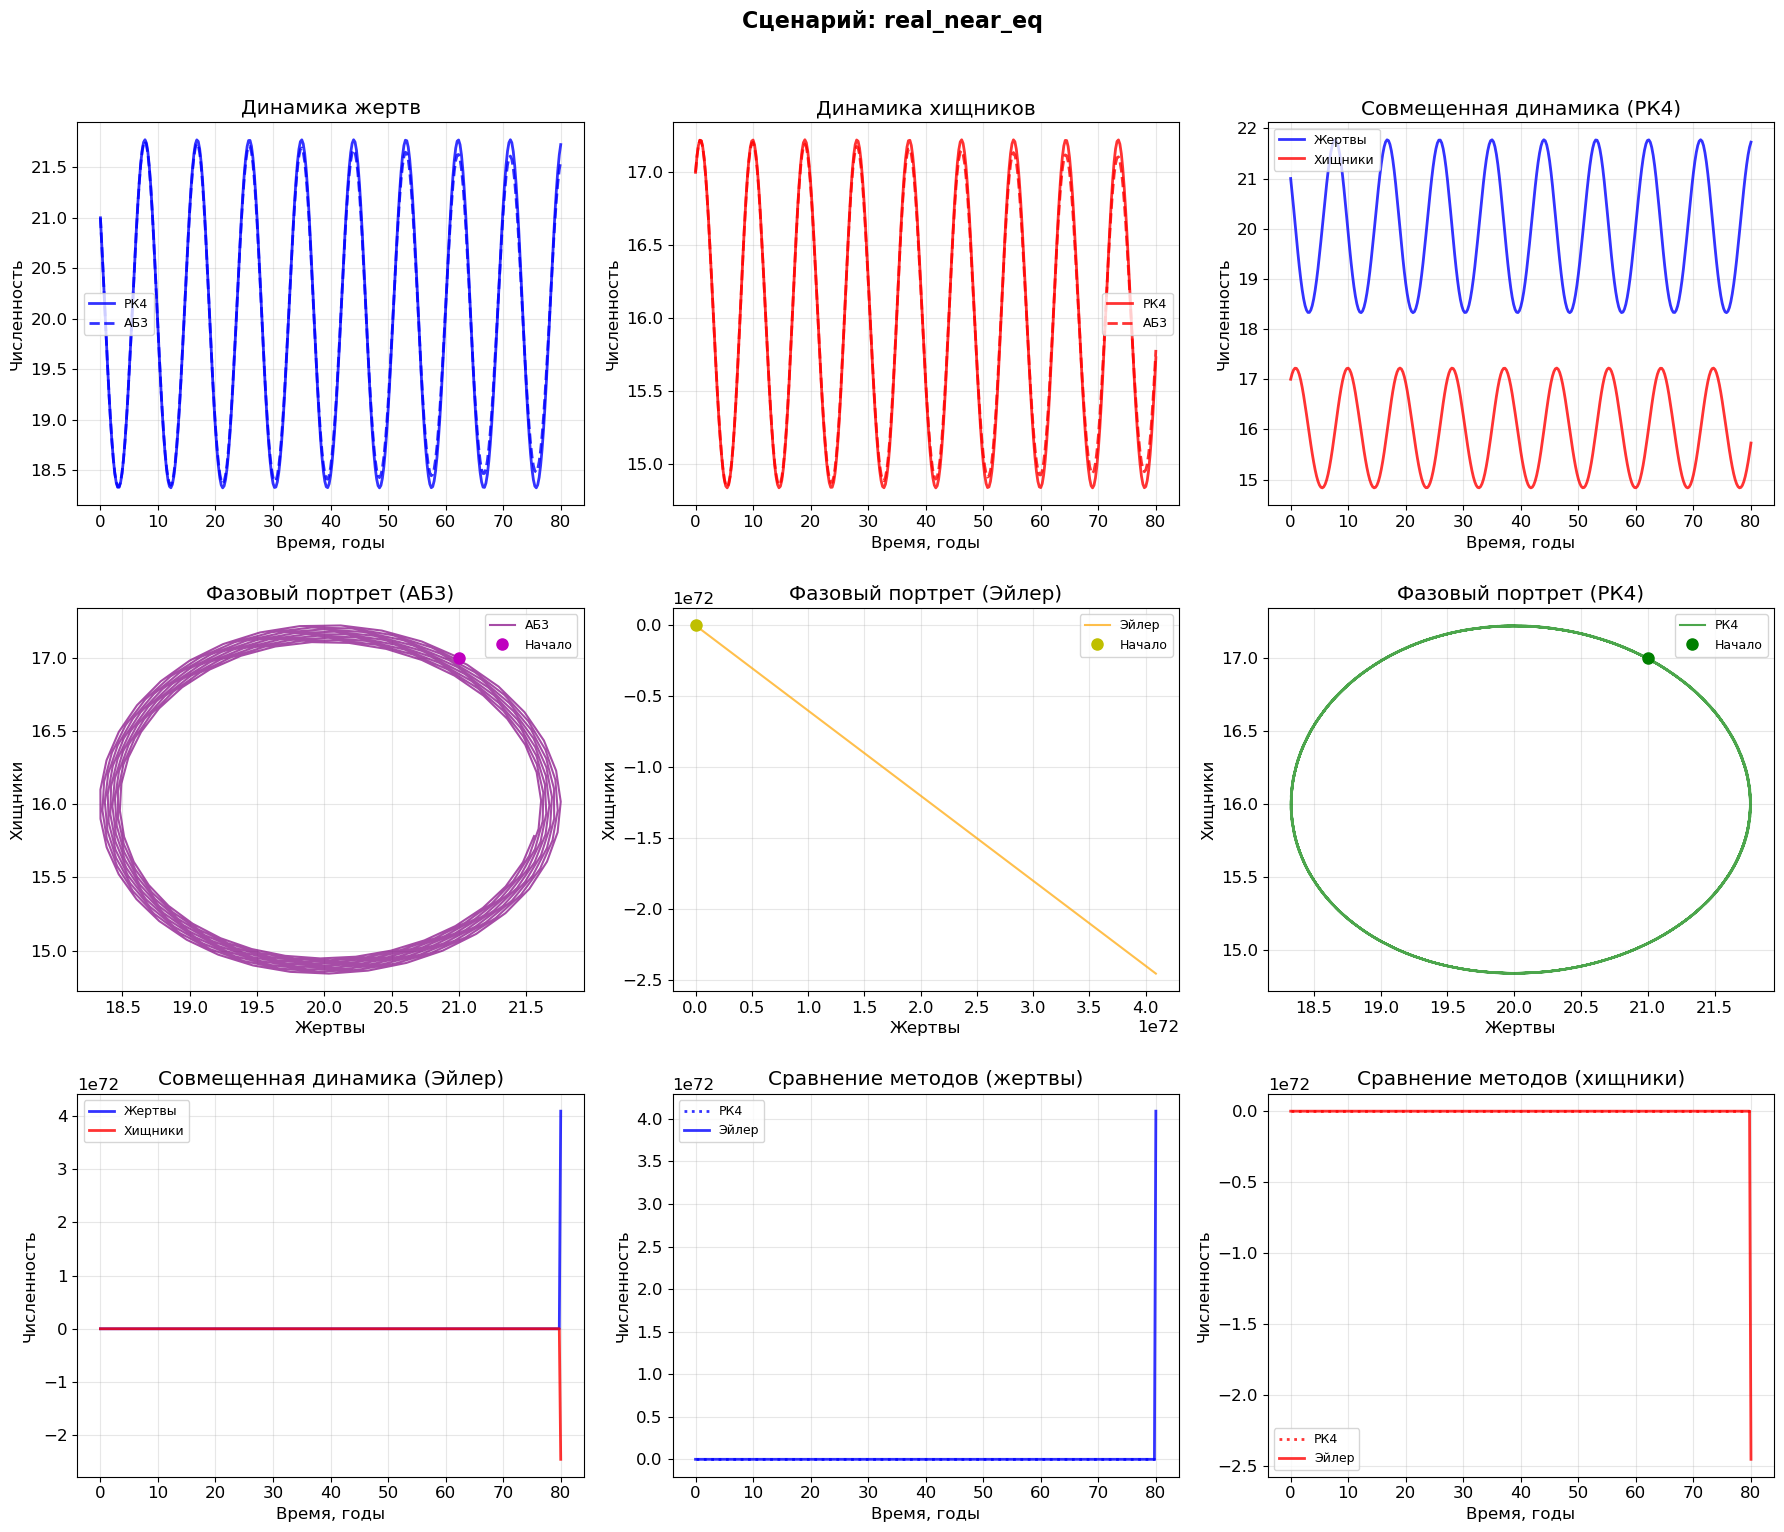

In [77]:
# 2.3 Сценарий: около равновесия
plot_scenario_comparison('real_near_eq')

## 